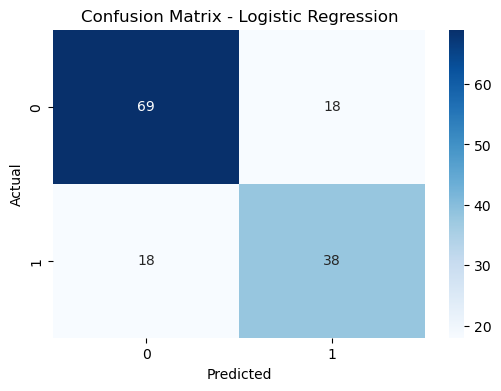

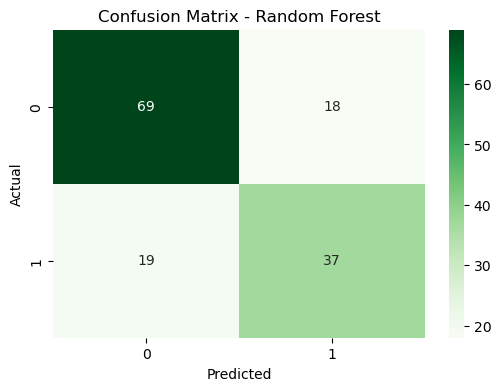

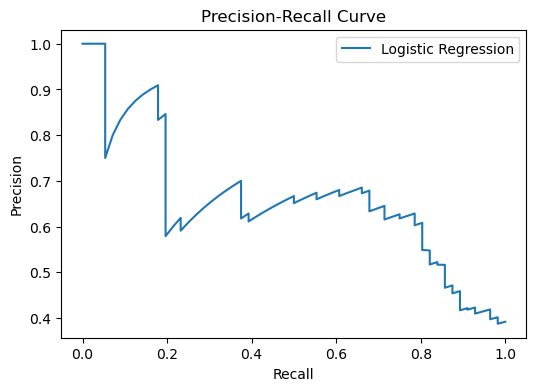

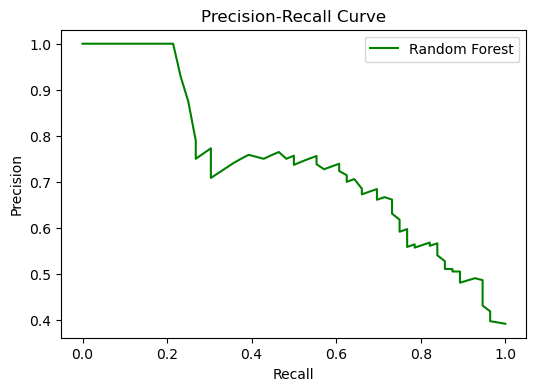

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        87
           1       0.68      0.68      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143


Random Forest Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79        87
           1       0.67      0.66      0.67        56

    accuracy                           0.74       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.74      0.74       143



In [1]:
# model_performance.ipynb

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc

# Load Dataset (Titanic again)
df = sns.load_dataset('titanic')

# Preprocess
df = df[['sex', 'age', 'fare', 'survived']].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

X = df[['sex', 'age', 'fare']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Create Results Directory
import os
if not os.path.exists('results'):
    os.makedirs('results')

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('results/confusion_matrix_lr.png')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('results/confusion_matrix_rf.png')
plt.show()

# Precision-Recall Curve for Logistic Regression
y_scores_lr = lr.predict_proba(X_test)[:,1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_scores_lr)
plt.figure(figsize=(6,4))
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.savefig('results/precision_recall_curve_lr.png')
plt.show()

# Precision-Recall Curve for Random Forest
y_scores_rf = rf.predict_proba(X_test)[:,1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
plt.figure(figsize=(6,4))
plt.plot(recall_rf, precision_rf, label='Random Forest', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.savefig('results/precision_recall_curve_rf.png')
plt.show()

# Model Comparison (print classification report)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))
